In [22]:
import tensorflow as tf
from keras import layers, models, regularizers
from keras.callbacks import EarlyStopping
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("C:\\AmaruAyelen\\proyectos\\PythonDataScienceMachineLearning\\PythonDataScienceMachineLearning\\bootcampIA\\RedesANN\\Concrete_Data.xls")

In [4]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [5]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [6]:
# Validación de nulos
print(df.isnull().sum())

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64


In [7]:
# Separar las características (X) de la etiqueta (y)
X = df.drop('Concrete compressive strength(MPa, megapascals) ', axis=1)
y = df['Concrete compressive strength(MPa, megapascals) ']

In [29]:
# Dividir los datos en conjuntos de entrenamiento (90%) y prueba (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.1, random_state=42)

# Dividir el 90% restante en entrenamiento (80%) y validación (20%)
X_val, X_test, y_val, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [47]:
# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [48]:
# Escalamiento del 10% de los datos
# Escalar los datos
scaler = StandardScaler()
X_val = scaler.fit_transform(X_temp)

In [32]:
# Se cambia la arquitectura de la red neuronal adicionando capas, regulando con Dropout 
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],))) 
model.add(Dropout(0.2))  # Regularización con Dropout
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01))) # kernel_regularizer penaliza los pesos grandes al añadir una penalización al costo del modelo.
model.add(Dropout(0.2))  # Regularización con Dropout
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1))  # Capa de salida para regresión

# Compilar el modelo
model.compile(optimizer='adam', 
              loss='mean_absolute_error', 
              metrics=['mean_squared_error'])

In [33]:
# Implementación Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [34]:
# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                    epochs=200, batch_size=32, 
                    callbacks=[early_stopping])

Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 35.9292 - mean_squared_error: 1465.2668 - val_loss: 31.9811 - val_mean_squared_error: 1229.2596
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.7103 - mean_squared_error: 1042.0963 - val_loss: 15.3217 - val_mean_squared_error: 340.2528
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.6017 - mean_squared_error: 340.7301 - val_loss: 13.2285 - val_mean_squared_error: 238.4900
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.9816 - mean_squared_error: 228.0844 - val_loss: 12.5000 - val_mean_squared_error: 213.9971
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.2599 - mean_squared_error: 242.3995 - val_loss: 11.9284 - val_mean_squared_error: 193.6637
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.4954 - mean_squared_error: 206.5492 - val_loss: 11.4972 - val_mean_squared_error: 180.4025
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.8206 - mean_squa

In [35]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_mse = model.evaluate(X_test, y_test)
print(f'Test Loss (MAE): {test_loss}')
print(f'Test MSE: {test_mse}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0090 - mean_squared_error: 21.4290
Test Loss (MAE): 4.065577983856201
Test MSE: 22.059606552124023


**Antes de la optimización:**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.4276 - mean_squared_error: 56.3664

Test Loss (MAE): 5.427606105804443
Test MSE: 56.36637878417969

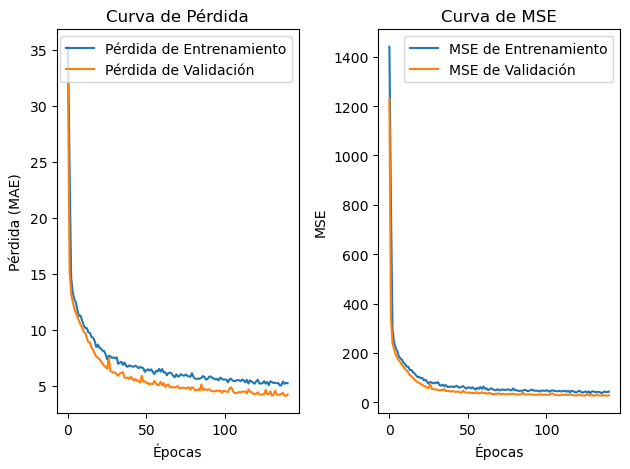

In [36]:
# Curva de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Curva de Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MAE)')
plt.legend()

# Curva de MSE
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_squared_error'], label='MSE de Entrenamiento')
plt.plot(history.history['val_mean_squared_error'], label='MSE de Validación')
plt.title('Curva de MSE')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

In [49]:
# Evaluar el modelo en el conjunto temporal (10%)
test_loss, test_mse = model.evaluate(X_temp, y_temp)
print(f'Test MAE: {test_loss:.2f}')
print(f'Test MSE: {test_mse:.2f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7332 - mean_squared_error: 42.7072 
Test MAE: 5.76
Test MSE: 42.46


In [50]:
# Hacer predicciones en el conjunto temporal
predictions = model.predict(X_temp)

# Imprimir algunas de las predicciones y los valores reales
for i in range(5):  # Imprimir las primeras 5 predicciones
    print(f'Predicción: {predictions[i][0]:.2f}, Real: {y_temp.iloc[i]:.2f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Predicción: 45.61, Real: 52.91
Predicción: 52.61, Real: 55.90
Predicción: 73.97, Real: 74.50
Predicción: 49.02, Real: 35.30
Predicción: 11.47, Real: 10.54
